# Import Used Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Reading Dataset

In [2]:
data_set = pd.read_csv(r"C:\Users\Mostafa Elgendy\Downloads\car_data.csv")
data_set_copy = data_set.copy()

#copy of Data_set
data_set_copy

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Dataset info

In [3]:
#show information about Dataset before Removing Duplicates
data_set_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
#show Dataset Head
data_set_copy.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data_set_copy.describe().round()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,103.0,1.0,99.0,174.0,66.0,54.0,2556.0,127.0,3.0,3.0,10.0,104.0,5125.0,25.0,31.0,13277.0
std,59.0,1.0,6.0,12.0,2.0,2.0,521.0,42.0,0.0,0.0,4.0,40.0,477.0,7.0,7.0,7989.0
min,1.0,-2.0,87.0,141.0,60.0,48.0,1488.0,61.0,3.0,2.0,7.0,48.0,4150.0,13.0,16.0,5118.0
25%,52.0,0.0,94.0,166.0,64.0,52.0,2145.0,97.0,3.0,3.0,9.0,70.0,4800.0,19.0,25.0,7788.0
50%,103.0,1.0,97.0,173.0,66.0,54.0,2414.0,120.0,3.0,3.0,9.0,95.0,5200.0,24.0,30.0,10295.0
75%,154.0,2.0,102.0,183.0,67.0,56.0,2935.0,141.0,4.0,3.0,9.0,116.0,5500.0,30.0,34.0,16503.0
max,205.0,3.0,121.0,208.0,72.0,60.0,4066.0,326.0,4.0,4.0,23.0,288.0,6600.0,49.0,54.0,45400.0


# Matrix Scatter plot

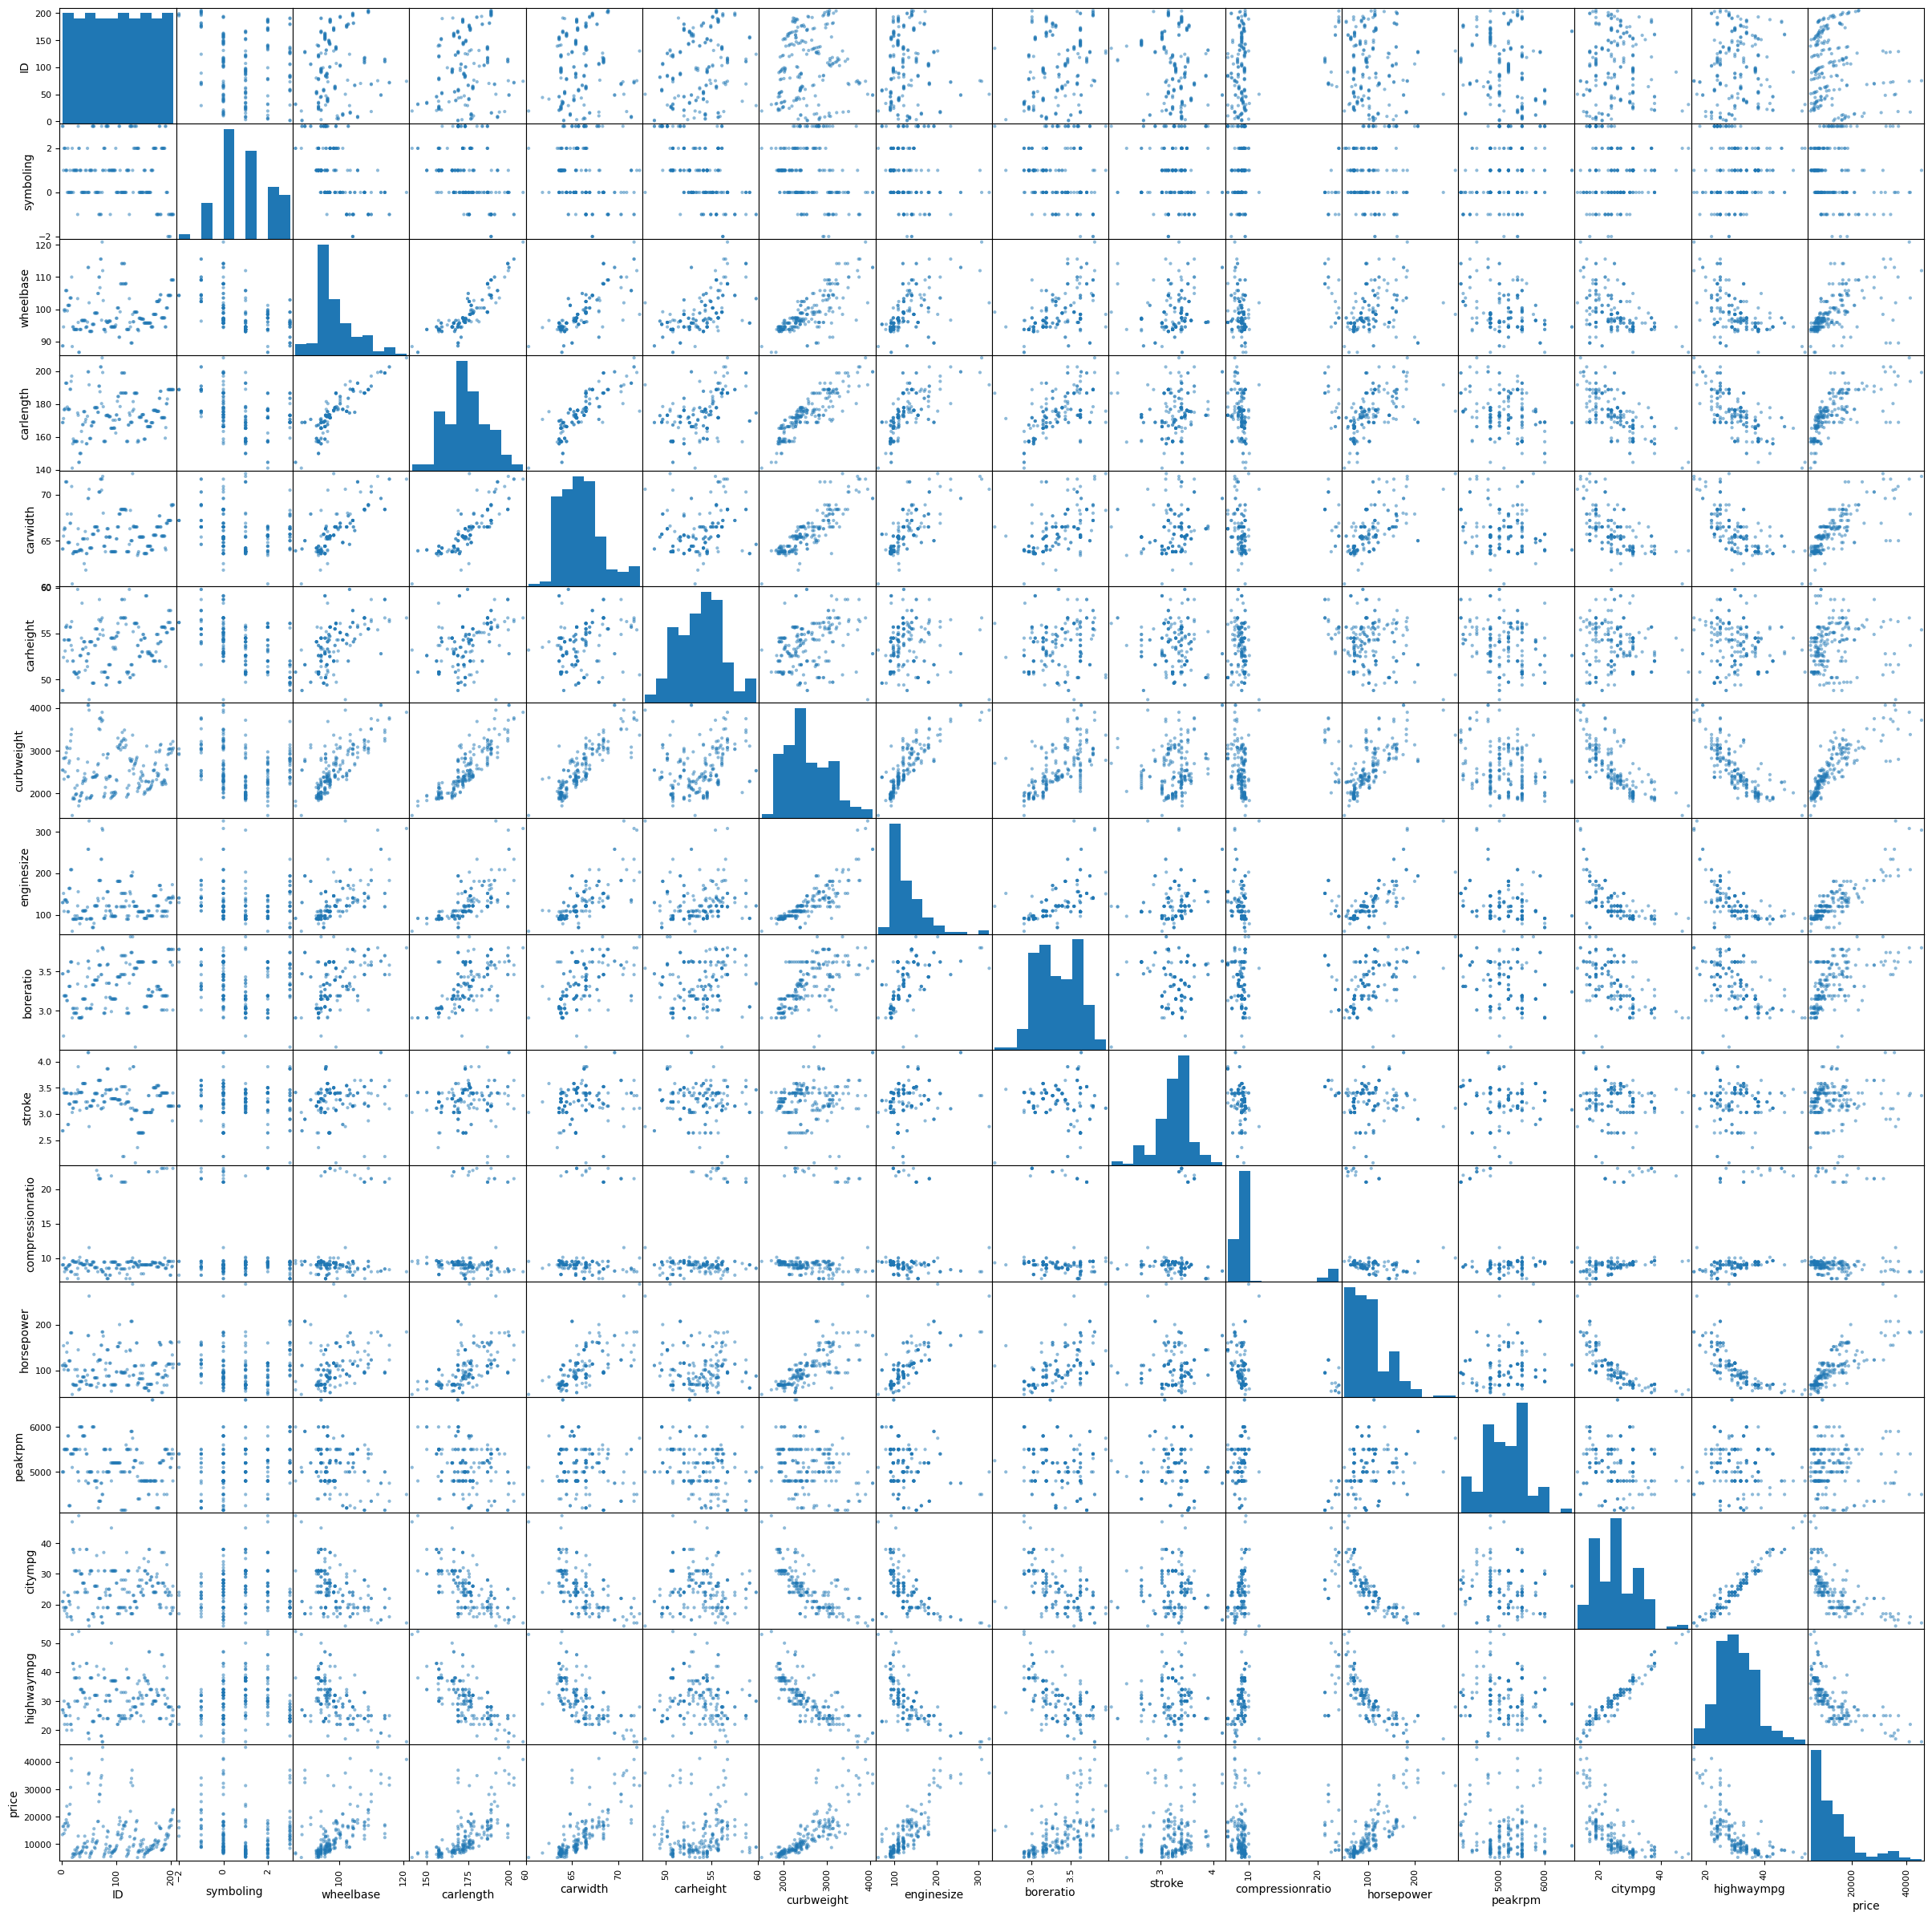

In [6]:
pd.plotting.scatter_matrix(data_set_copy,figsize=(30,30));

# Choosing Features from Matrix Scatter plot

In [7]:
# The matrix scatter plot shows that the price is
# positive correlation with Features --> enginesize, curbweight, horsepower, carwidth and carlength.
# negative correlation with Features --> highwaympg, citympg.
# we will choose the first four features to work in linear regression model --> enginesize, curbweight, horsepower, carwidth.

# Minimax Scaler

In [8]:
data_set_copy["enginesize"] = (data_set_copy["enginesize"]-np.min(data_set_copy["enginesize"]))/(np.max(data_set_copy["enginesize"])-np.min(data_set_copy["enginesize"]))
data_set_copy["curbweight"] = (data_set_copy["curbweight"]-np.min(data_set_copy["curbweight"]))/(np.max(data_set_copy["curbweight"])-np.min(data_set_copy["curbweight"]))
data_set_copy["horsepower"] = (data_set_copy["horsepower"]-np.min(data_set_copy["horsepower"]))/(np.max(data_set_copy["horsepower"])-np.min(data_set_copy["horsepower"]))
data_set_copy["carwidth"] = (data_set_copy["carwidth"]-np.min(data_set_copy["carwidth"]))/(np.max(data_set_copy["carwidth"])-np.min(data_set_copy["carwidth"]))

In [9]:
#Dataset sample after normalization
data_set_copy.head() 

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,0.260377,mpfi,3.47,2.68,9.0,0.262500,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,0.260377,mpfi,3.47,2.68,9.0,0.262500,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,0.343396,mpfi,2.68,3.47,9.0,0.441667,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,0.181132,mpfi,3.19,3.40,10.0,0.225000,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,0.283019,mpfi,3.19,3.40,8.0,0.279167,5500,18,22,17450.0


# Shuffle and Splitting the Dataset

# Splitting Dataset

In [10]:
# the Training X features
x = data_set_copy[["enginesize","curbweight","horsepower","carwidth"]].values

# actual Output Value
y= data_set_copy["price"].values       


In [11]:
#Shuffle Dataset and split
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.2, random_state=1,shuffle=True)

In [12]:
#Dataset sample after Shuffle
data_set_copy.head() 

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,0.260377,mpfi,3.47,2.68,9.0,0.262500,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,0.260377,mpfi,3.47,2.68,9.0,0.262500,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,0.343396,mpfi,2.68,3.47,9.0,0.441667,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,0.181132,mpfi,3.19,3.40,10.0,0.225000,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,0.283019,mpfi,3.19,3.40,8.0,0.279167,5500,18,22,17450.0


In [13]:
print(x_Train.shape)
print(x_Test.shape)
print(y_Train.shape)
print(y_Test.shape)

(164, 4)
(41, 4)
(164,)
(41,)


# Linear Regression Model Implementation

In [14]:
class LinearRegression:
    Learning_rate=0
    num_Iterations=0 
    weights=None   # Theta 1 ,2,3,.....
    bias = None    # Theta 0
    MSE_Errors=[]
    
    def __init__(self,Lrate,Iterations):
        
        self.Learning_rate=Lrate
        self.num_Iterations=Iterations
        self.MSE_Errors=[]
        
        
    def calculate_MSE(self,y_Test,y_Predict):
        return np.mean((y_Test-y_Predict)**2)
    
    def fit_Data_with_Model(self,x_Train,y_Train): # Define THetas
        
        Num_Of_Features= x_Train.shape[1]
       
        self.weights=np.zeros(Num_Of_Features) 
        
        self.bias = 0
        
        for i in range(self.num_Iterations):
            #Linear Model
            Linear_Equation = np.dot(x_Train,self.weights) + self.bias   #y=ax+b hypothesis
                                    # 164*4    4*1
            # Partial Derivative of Weight
            Diff_weight = (1/x_Train.shape[0]) * np.dot(x_Train.T , (Linear_Equation-y_Train))   
                                                        #4*164            164*1
            # Partial Derivative of bias
            Diff_bias= (1/x_Train.shape[0]) * np.sum(Linear_Equation-y_Train)
            
            #getting New Weights for THETAS
            self.weights= self.weights - (self.Learning_rate * Diff_weight)   #2*1  -    2*320  
            
            self.bias= self.bias - (self.Learning_rate * Diff_bias)
            
            #getting Mean Square Error
            self.MSE_Errors.append(self.calculate_MSE(y_Train,Linear_Equation))
            
            
    def Predict(self,x_Test): # this function predicts the Y from Test Data
        Linear_Equation= np.dot(x_Test,self.weights) + self.bias
        return Linear_Equation


# Running the Model

## Test Case #1

In [15]:
Model_1=LinearRegression(0.001,400)
Model_1.fit_Data_with_Model(x_Train,y_Train)
y_predict=Model_1.Predict(x_Test)

####  Plotting MSE for Test Case #1

Text(0.5, 1.0, 'MSE Over Iterations Test Case #1')

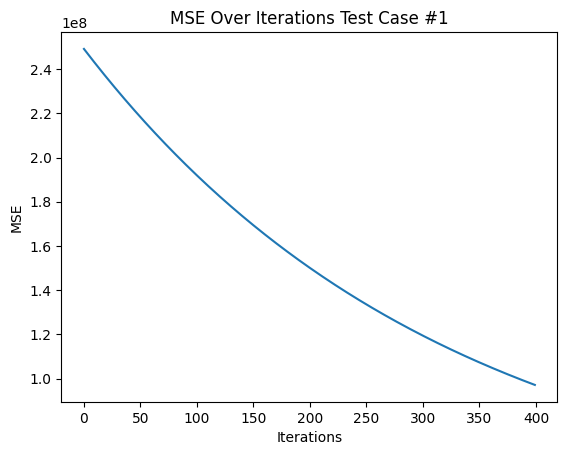

In [16]:
plt.plot(Model_1.MSE_Errors);
plt.xlabel('Iterations') 
plt.ylabel('MSE') 
plt.title('MSE Over Iterations Test Case #1')

## Test Case #2

In [17]:
Model_2=LinearRegression(0.003,400)
Model_2.fit_Data_with_Model(x_Train,y_Train)
y_predict=Model_2.Predict(x_Test)

#### Plotting MSE for Test Case #2

Text(0.5, 1.0, 'MSE Over Iterations')

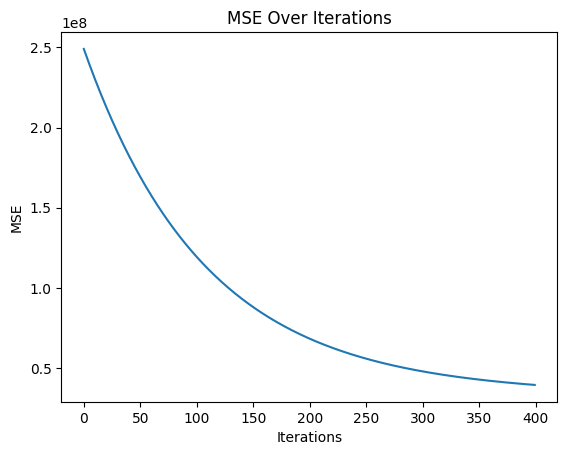

In [18]:
plt.plot(Model_2.MSE_Errors);
plt.xlabel('Iterations') 
plt.ylabel('MSE') 
plt.title('MSE Over Iterations')

## Test Case #3

In [19]:
Model_3=LinearRegression(0.005,400)
Model_3.fit_Data_with_Model(x_Train,y_Train)
y_predict=Model_3.Predict(x_Test)

#### Plotting MSE for Test Case #3

Text(0.5, 1.0, 'MSE Over Iterations')

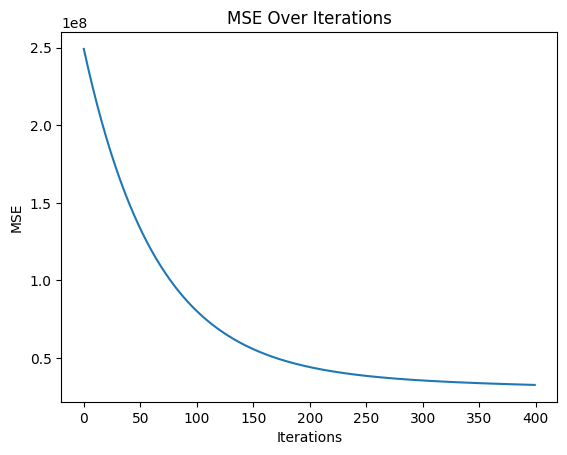

In [20]:
plt.plot(Model_3.MSE_Errors);
plt.xlabel('Iterations') 
plt.ylabel('MSE') 
plt.title('MSE Over Iterations')